# Beam forming simulation

Date: Nov 21 and Dec 15, 2018, Update: Sep 24, 2023

## One sample shift

Speed of sound: $c = 343[m/s]$

Sampling frequency: $f_s = 19500 [kHz]$

Length of one-sample shift: $s = 343/19500[m] = 17.6[mm]$

In [1]:
F_s = 80_000_000.0 / 64 / 64  # Sampling frequency
C = 343.0  # 343m/s
S = C / F_s  # Length of one sample shift
Smm = S * 1000
'Length of one sample shift: {} mm'.format(Smm)

'Length of one sample shift: 17.5616 mm'

## Angles at n shift

- d: distance between MEMS microphones
- n: the number of shifts

In [2]:
import numpy as np

def theta(d, n):
    return np.arccos(Smm*n/d) * 180 / np.pi

In [3]:
# d = Smm: max n = 1

theta(Smm, 0), theta(Smm, 1)

(90.0, 0.0)

In [4]:
# d = 20mm: max n = 1

theta(20.0, 0), theta(20.0, 1)

(90.0, 28.588384736183126)

In [5]:
# d = Smm: max n = 2

theta(Smm*2, 0), theta(Smm*2, 1), theta(Smm*2, 2)

(90.0, 60.00000000000001, 0.0)

In [6]:
# d = Smm * 3, max n = 3

theta(Smm*3, 0), theta(Smm*3, 1), theta(Smm*3, 2), theta(Smm*3, 3)

(90.0, 70.52877936550931, 48.189685104221404, 0.0)

## Null frequencies

$ f = \frac  {c (2m - 1)} {2 \cdot s \cdot n} $

In [7]:
def calc_null_freq(n, m):
    return int((C*(2*m-1))/(S*n*2))

In [8]:
calc_null_freq(1, 1)

9765

In [9]:
calc_null_freq(2, 1), calc_null_freq(2, 2)

(4882, 14648)

## Response of a two microphone array with 2.54mm * 8 (20.32mm) spacing

Power:
$$\int_{0}^{T} \Bigl( f_1(t) + f_1(t - \frac{d \cos \theta}{c}) \Bigr)^2 dt$$

Descrete form:
$$\sum_{n=0}^{N-1} \Bigl( f_1[n] + f_2[n] \Bigr)^2$$

In this project, N = 512.

$$ \omega = 2 \pi f$$
$$ t = \frac{n}{f_s} $$

$$ f_1[n] = \sin \Bigl( \omega \frac{n}{f_s} \Bigr) $$

$$ f_2[n] = \sin \Bigl( \omega (\frac{n}{f_s} - \frac{d \cos \theta}{c}) \Bigr) $$

In [10]:
omega = lambda f: 2 * np.pi * f
d = 0.00254 * 8  # DIP board 2.54mm pitch * 8 holes

N = 512
n = np.arange(0, N, 1)

t = lambda n: n / F_s

def f1(n, f):
    return np.sin(omega(f) * t(n))

def f2(n, f, theta):
    return np.sin(omega(f) * (t(n) - (d * np.cos(theta)/C)))

def broadside(f, theta, delta_n=0):
    return np.sum((f1(n,f)+f2((n-delta_n),f,theta))**2)

def endfire(f, theta, delta_n=0):
    return np.sum((f1(n,f)-f2((n-delta_n),f,theta))**2)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

theta = np.arange(0, 2*np.pi, 0.01)

def plot(delta_n=0, func=broadside, logscale=True):
    plt.figure(figsize=[6,6])
    ax = plt.subplot(111, projection='polar')
    freqs = [500, 1000, 2000, 4000, 6000, 8000]
    for f in freqs:
        r = np.array([func(f, t, delta_n) for t in theta])
        if logscale:
            ax.plot(theta, 10*np.log(r), label='{} Hz'.format(int(f)))
        else:
            ax.plot(theta, r, label='{} Hz'.format(int(f)))
        #ax.set_yticklabels([])
        ax.set_title(func.__name__)
    ax.grid(True)
    ax.legend()
    plt.savefig('{}_n={}.jpg'.format(func.__name__, delta_n))

# Broadside mode

(None, None, None)

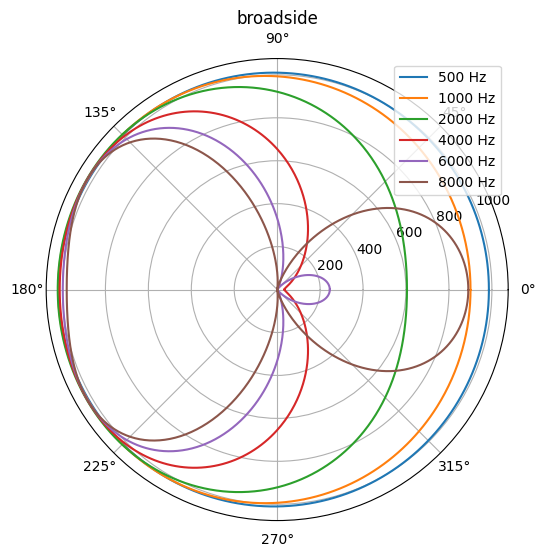

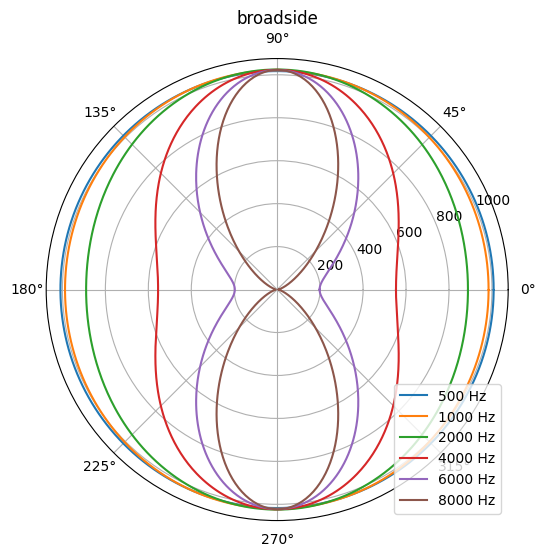

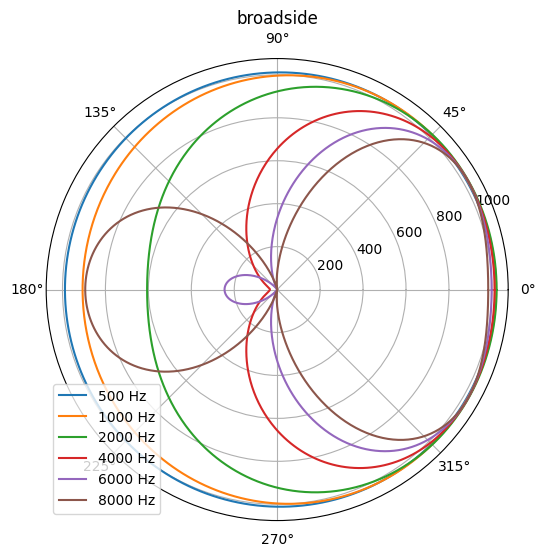

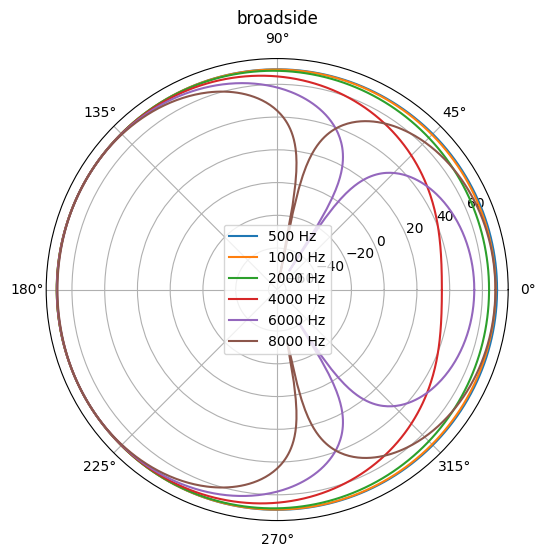

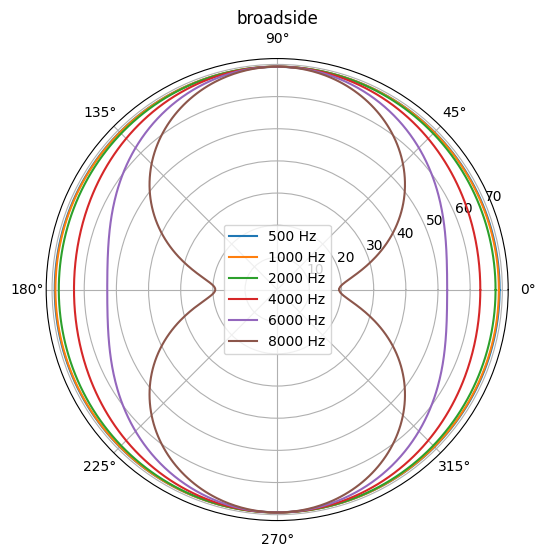

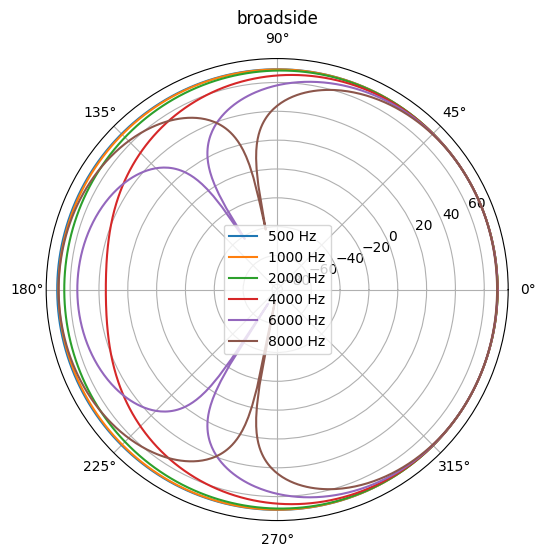

In [12]:
plot(1, logscale=False), plot(0, logscale=False), plot(-1, logscale=False)
plot(1), plot(0), plot(-1)

## Endfire mode

(None, None, None)

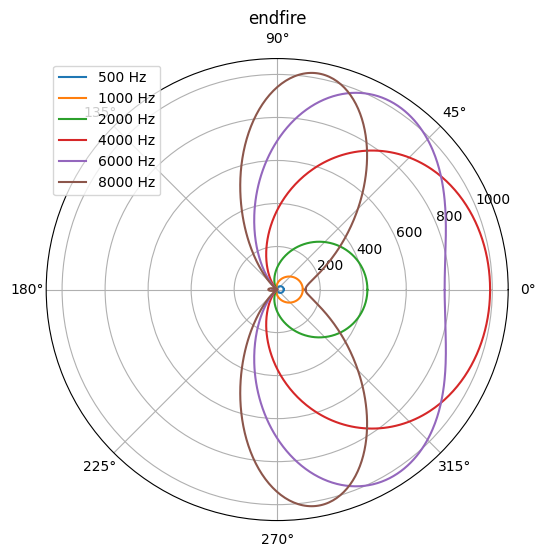

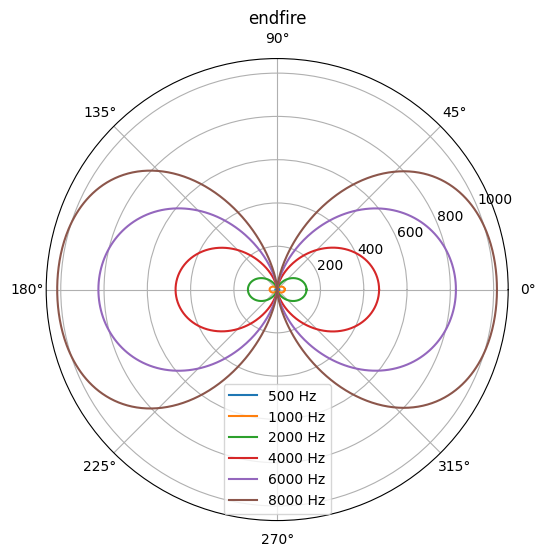

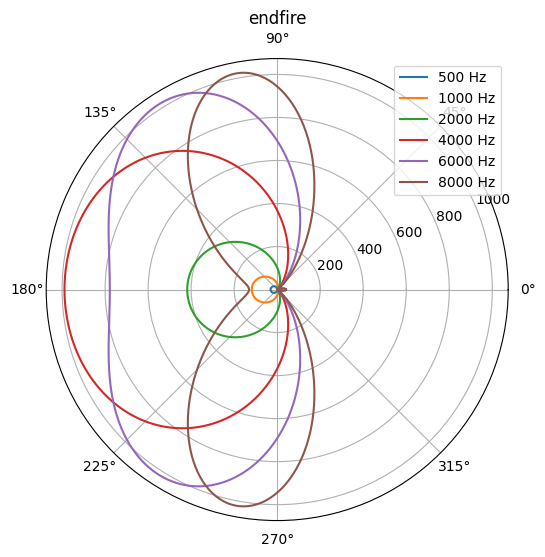

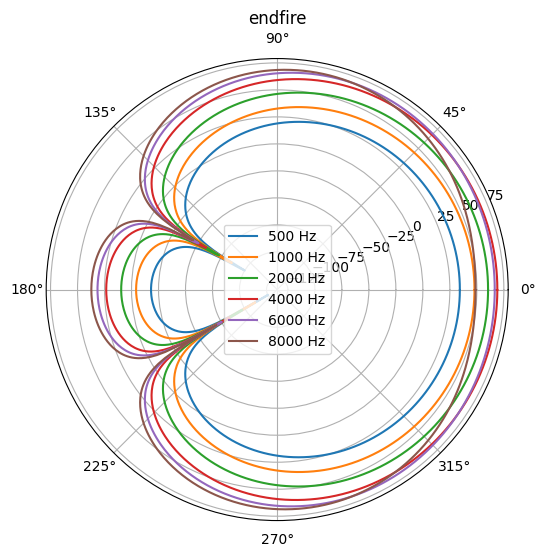

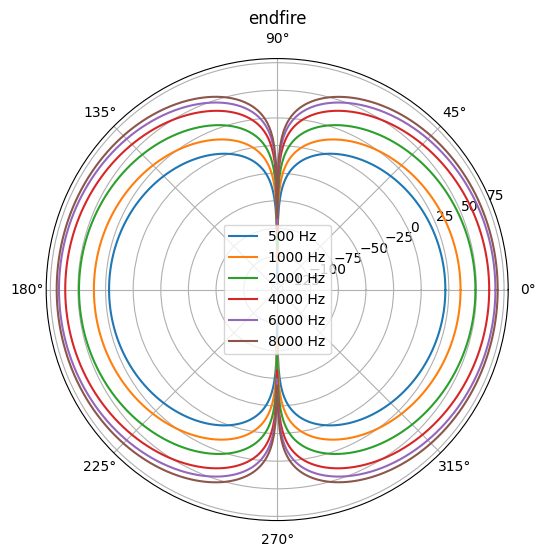

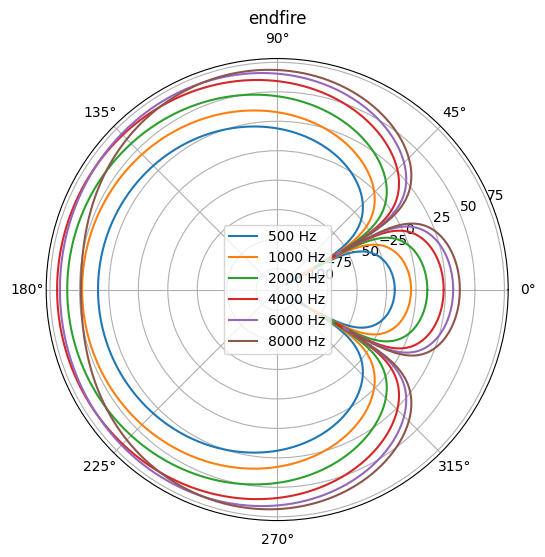

In [13]:
plot(1, func=endfire, logscale=False), plot(0, func=endfire, logscale=False), plot(-1, func=endfire, logscale=False)
plot(1, func=endfire), plot(0, func=endfire), plot(-1, func=endfire)

## Conclusion

- Distance between MEMS microphones: 20mm
- Broadside mode at delta n = 0
- Endfire mode at delta n = -1 or 1 with low pass filter to flattern the frequency response